#Authors

In [1]:
# Zaky Syihab Hatmoko
# 18/425535/PA/18427
# Co-author: Ivan L. Ihwani
# Data Saham Bank BNI dari 1 Mei 2016 s.d. 13 Mei 2024

#Importing Library

In [4]:
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Importing Dataset

In [5]:
df = yf.download('BBNI.JK', start='2016-05-01', end=None)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,2290.0,2290.0,2235.0,2245.0,1787.617798,66135200
2016-05-03,2250.0,2335.0,2250.0,2315.0,1843.356567,143596200
2016-05-04,2315.0,2325.0,2260.0,2310.0,1839.375122,85179600
2016-05-09,2325.0,2325.0,2235.0,2245.0,1787.617798,79900800
2016-05-10,2250.0,2285.0,2225.0,2280.0,1815.487305,66174200
...,...,...,...,...,...,...
2024-09-24,5800.0,5825.0,5750.0,5800.0,5800.000000,39900400
2024-09-25,5750.0,5750.0,5450.0,5600.0,5600.000000,120885200
2024-09-26,5600.0,5625.0,5450.0,5600.0,5600.000000,59306200


In [6]:
df.shape

(2086, 6)

#Data Visualization

##Close Price History

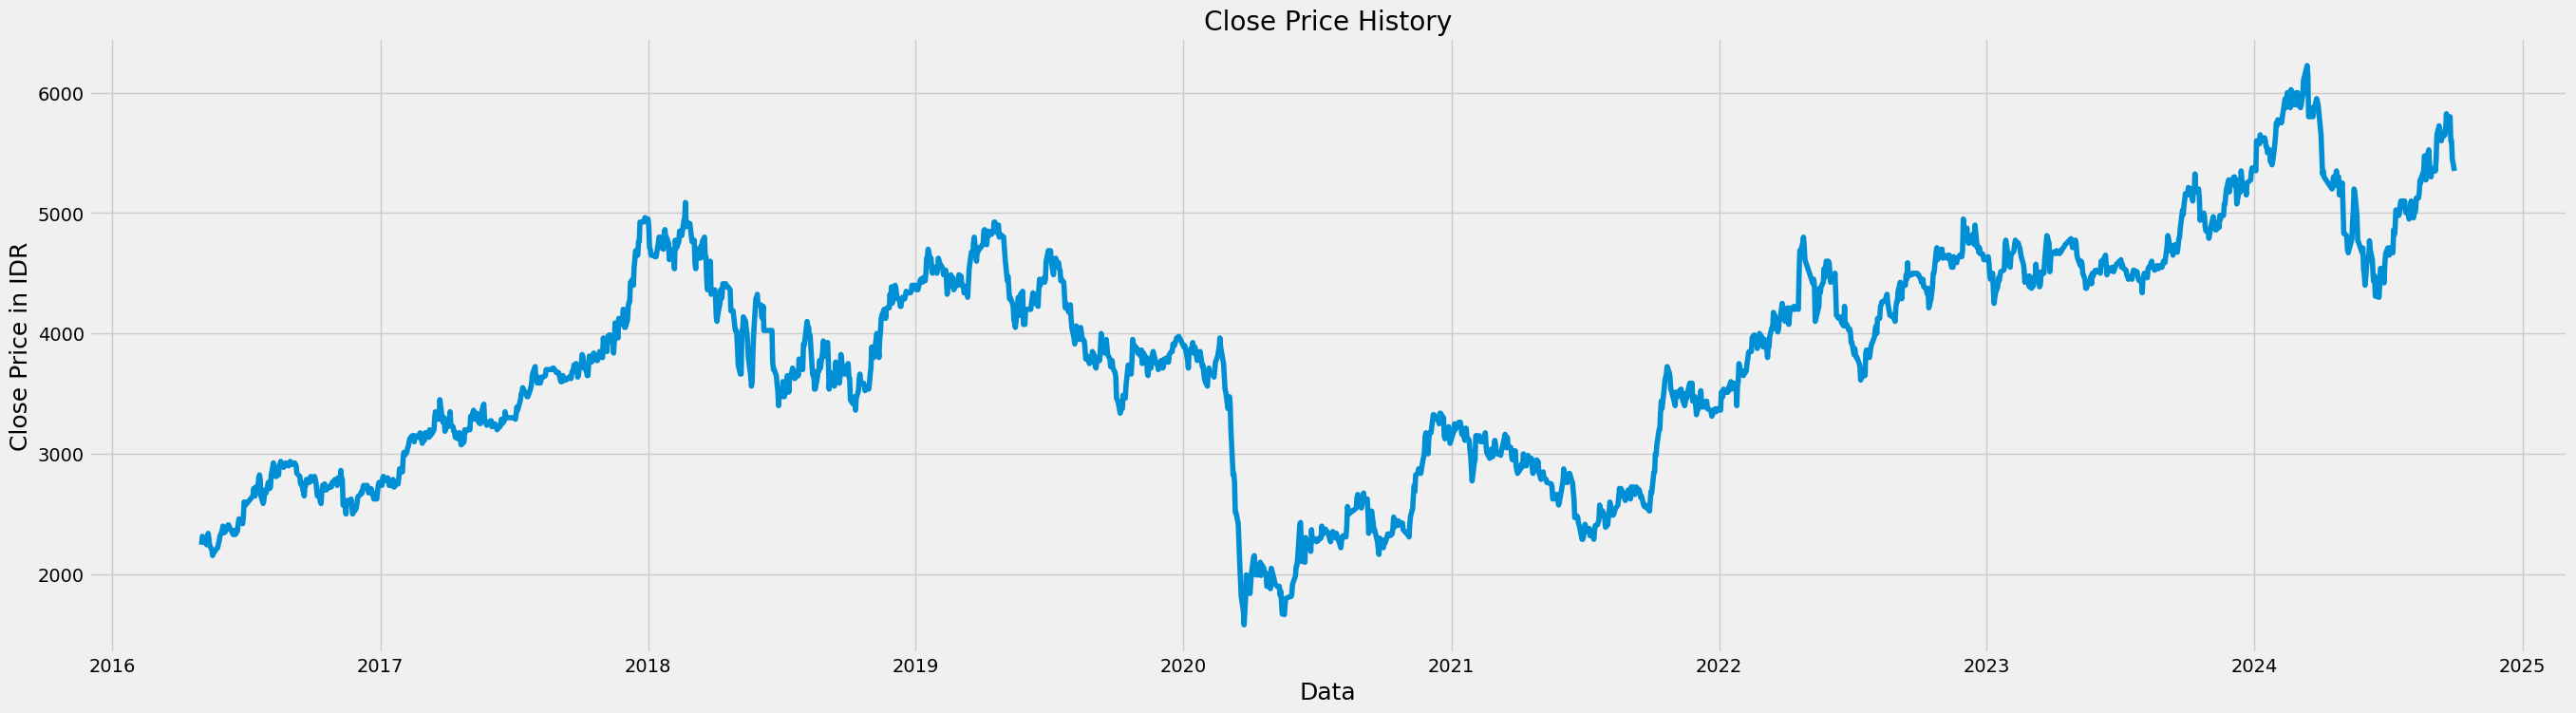

In [8]:
plt.figure(figsize=(30,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price in IDR', fontsize=18)
plt.show()

#Data Preprocessing

##Only use the 'Close' column

In [9]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to numpy array
dataset = data.values

# Get the number of rows to train the model (train = 80%, test = 20%)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1669

##Scale the data

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14316469],
       [0.15823466],
       [0.15715823],
       ...,
       [0.86544672],
       [0.83315393],
       [0.8116254 ]])

##Create Training Dataset

In [11]:
train_data = scaled_data[0:training_data_len, :]

# Spit the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])

  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.14316469, 0.15823466, 0.15715823, 0.14316469, 0.15069968,
       0.16361679, 0.15392896, 0.14208827, 0.13455328, 0.12378902,
       0.13347686, 0.12917115, 0.131324  , 0.13670614, 0.13778256,
       0.14531755, 0.14962325, 0.15823466, 0.1679225 , 0.17653391,
       0.17330463, 0.16469322, 0.16576964, 0.17330463, 0.17868676,
       0.17868676, 0.17330463, 0.1722282 , 0.16469322, 0.16146394,
       0.16899892, 0.16254037, 0.16146394, 0.1679225 , 0.18191604,
       0.18945102, 0.18622174, 0.18622174, 0.18083961, 0.1926803 ,
       0.21959096, 0.21959096, 0.21420883, 0.23035522, 0.24381055,
       0.24111948, 0.23035522, 0.24650161, 0.24919268, 0.26264801,
       0.26803014, 0.25995694, 0.23035522, 0.21689989, 0.22228202,
       0.23842842, 0.24111948, 0.23573735, 0.25457481, 0.24919268])]
[0.24381054897739507]

[array([0.14316469, 0.15823466, 0.15715823, 0.14316469, 0.15069968,
       0.16361679, 0.15392896, 0.14208827, 0.13455328, 0.12378902,
       0.13347686, 0.12917115, 0.13

In [12]:
# Convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1609, 60, 1)

#Build The LSTM Model

##Training Data

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=5, epochs=30, verbose=2)

Epoch 1/30
322/322 - 18s - 55ms/step - loss: 0.0041
Epoch 2/30
322/322 - 14s - 44ms/step - loss: 0.0012
Epoch 3/30
322/322 - 15s - 46ms/step - loss: 9.4798e-04
Epoch 4/30
322/322 - 14s - 44ms/step - loss: 6.5594e-04
Epoch 5/30
322/322 - 14s - 44ms/step - loss: 5.3122e-04
Epoch 6/30
322/322 - 14s - 45ms/step - loss: 4.7725e-04
Epoch 7/30
322/322 - 21s - 64ms/step - loss: 4.3382e-04
Epoch 8/30
322/322 - 20s - 62ms/step - loss: 3.8919e-04
Epoch 9/30
322/322 - 22s - 68ms/step - loss: 3.8984e-04
Epoch 10/30
322/322 - 19s - 60ms/step - loss: 3.5894e-04
Epoch 11/30
322/322 - 14s - 45ms/step - loss: 3.1976e-04
Epoch 12/30
322/322 - 21s - 65ms/step - loss: 3.0632e-04
Epoch 13/30
322/322 - 20s - 61ms/step - loss: 3.2901e-04
Epoch 14/30
322/322 - 21s - 64ms/step - loss: 3.3587e-04
Epoch 15/30
322/322 - 20s - 63ms/step - loss: 3.5632e-04
Epoch 16/30
322/322 - 14s - 45ms/step - loss: 3.0960e-04
Epoch 17/30
322/322 - 14s - 44ms/step - loss: 3.2246e-04
Epoch 18/30
322/322 - 14s - 43ms/step - loss: 2.

##Testing Data

In [15]:
# Create Testing Data
test_data = scaled_data[training_data_len - 60: len(dataset)]

# Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [16]:
# Convert the data into numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [18]:
# Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

75.36624723658574

#Visualization

<ipython-input-19-70216de76af1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


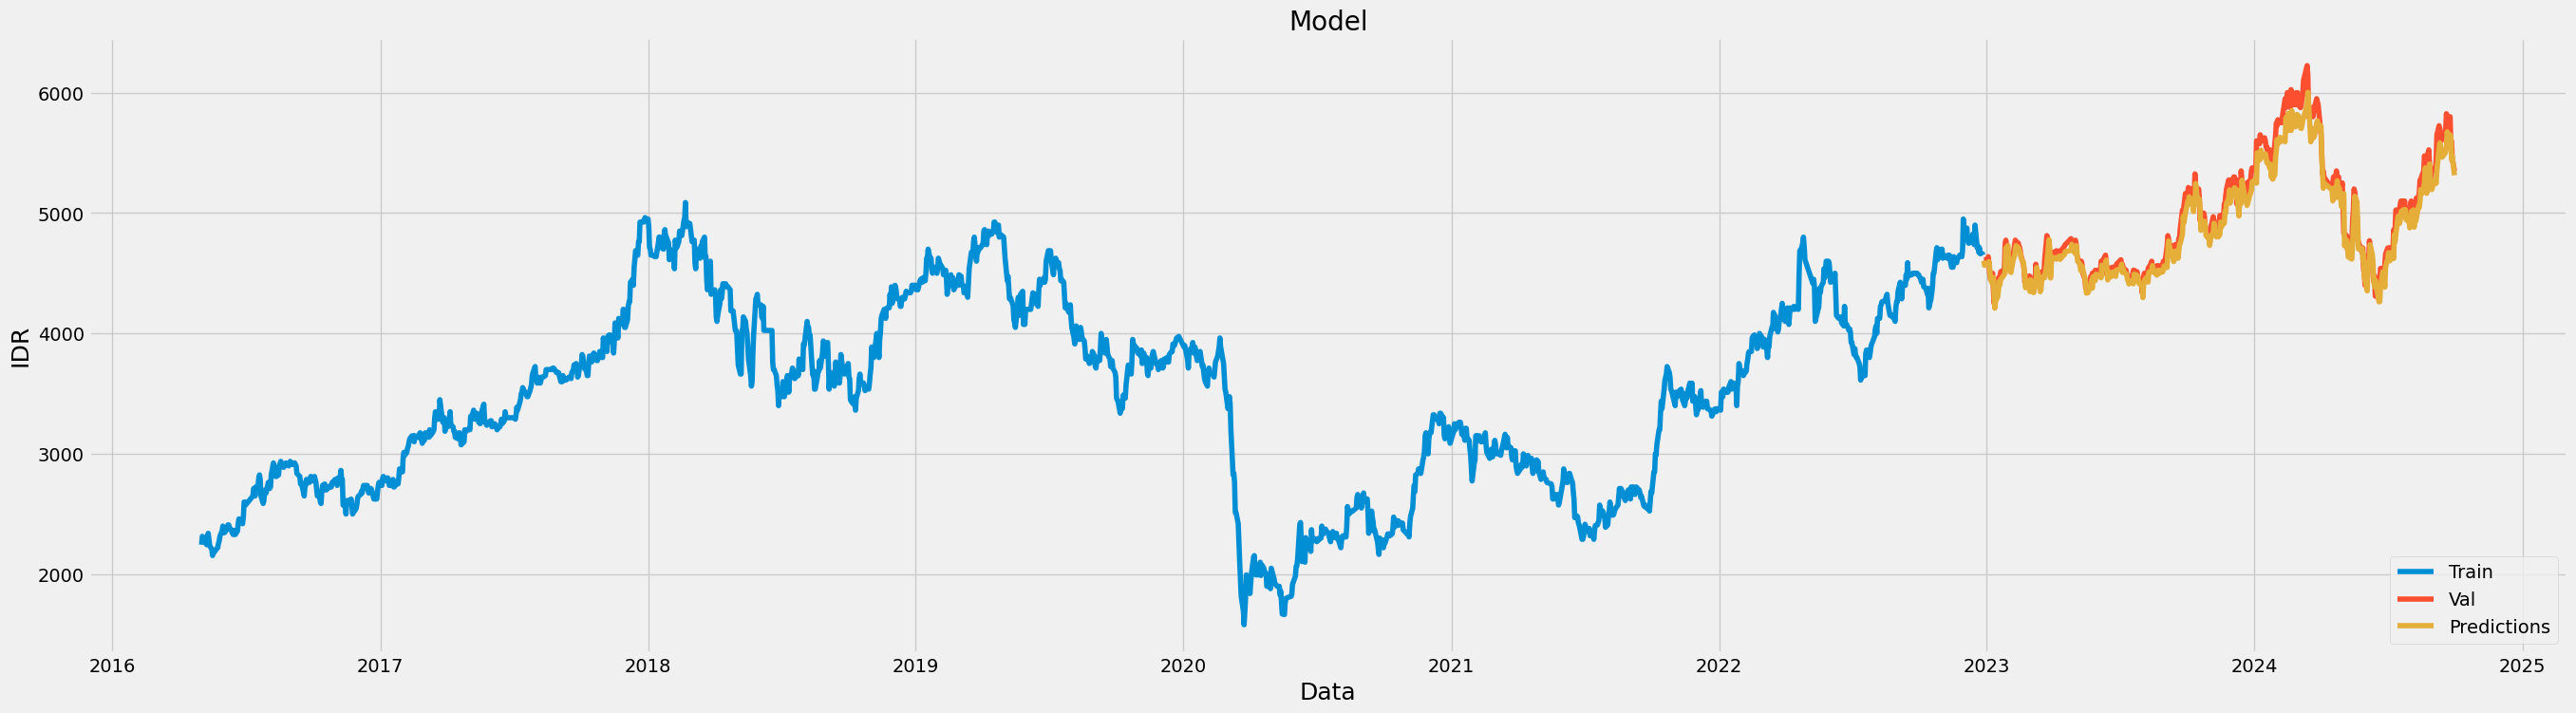

In [19]:
# Plot
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Prediction Result and Actual Data

In [20]:
valid

,Close,Predictions
Date,,
2022-12-28,4612.5,4603.687012
2022-12-29,4612.5,4566.280762
2022-12-30,4612.5,4569.503418
2023-01-02,4612.5,4569.411621
2023-01-03,4637.5,4569.894043
...,...,...
2024-09-24,5800.0,5649.351074
2024-09-25,5600.0,5637.052246
2024-09-26,5600.0,5440.724609
